In [1]:
import importlib
from pathlib import Path
import numpy as np
import pyspectral.data.dataset as pyd
import pyspectral.data.io as pyi
import pyspectral.modeling.train as pyt
import pyspectral.data.features as pyf
from pyspectral.config import DATA_DIR
csv_path = DATA_DIR / "annotations_S80.csv"
#importlib.reload(pyt)
#importlib.reload(pyd)

In [2]:
import pyspectral.modeling.predict as pyp
rows = pyi.read_pairs(csv_path, DATA_DIR)
spectra, arts = pyi.SpectraPair.from_annotations(rows)
pyp.eval(spectra.X_raw, spectra.Y_proc, n_splits=4)


Identity RMSE: 0.166052
Diagonal affine RMSE (oof): 0.530873
PCR(32) RMSE (oof): 0.653871


100%|███████████████████████████████████████████████████████████████████████████| 4/4 [00:26<00:00,  6.71s/it]

MultiTaskElasticNet RMSE (oof): 0.007851


In [3]:
importlib.reload(pyt)
oof_stats=pyt.cv_train_model(spectra, arts, epochs=5, n_splits=4) 
print("---------------------------")

4it [04:23, 65.91s/it]

---------------------------


In [4]:
plot_data = pyp.predict_cube(0, oof_stats, DATA_DIR, csv_path)

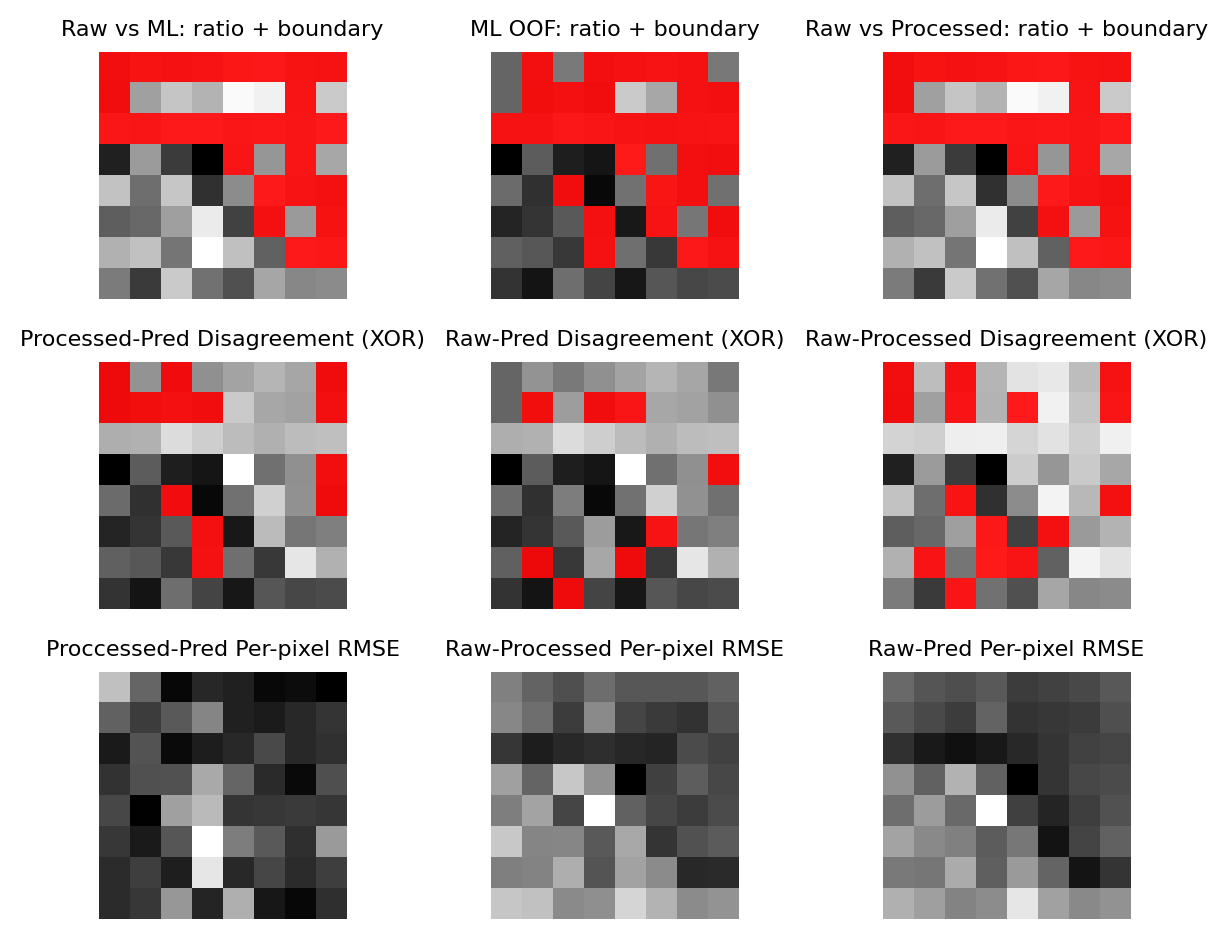

{}

In [5]:
import pyspectral.plots as plots
importlib.reload(plots)
plots.compare_boundaries(plot_data, up=False)